# Dealing with Problems with Uncertainty
Author: Jin Yeom (jinyeom@utexas.edu)

In this notebook, we're going to explore AI methods based on the probability theory for solving problems with uncertainty. We'll first look at Bayesian Networks (or Belief Networks), Hidden Markov Models (HMMs), then finally Decision Networks. **Note**: this notebook is based on Dr. Scott Niekum's lecture on Artificial Intelligence (CS343) from the University of Texas at Austin. **Also note**: this notebook will assume some knowledge in the probability theory, and will not go over details in basic probability.

## Bayesian Network
As the name suggests, the Bayesian network (BNs, or sometimes called belief network or Bayes nets) is based on Bayes' rule:

$$P(X|Y) = \frac{P(Y|X)P(X)}{P(Y)}$$

where $X$ and $Y$ are both random variables. It is also called a network, due to its representation, i.e., all the possible events are represented as nodes in a directed acyclic graph with their likelihoods, and are connected with other based on assumed direct influences. Essentially, the network altogether models some part of the real world. We can use this network to compute unobserved relationships among events that seem independent, formally called conditional independence.

Bayes nets are composed of the topology of the network, which is often designed by hand, and tables for local conditional probabilities (Conditional Probability Tables, or CPTs), computed from data of event counts. For this notebook, we're not going to construct a Bayes net, and use a hypothetical one, found in Dr. Niekum's lecture.

Let's look at a simple example. Consider 5 events $B = \text{\{Burglary\}}$, $A = \text{\{Alarm goes off\}}$, $M = \text{\{Mary calls\}}$, $J = \text{\{John calls\}}$, $E = \text{\{Earthquake!\}}$.

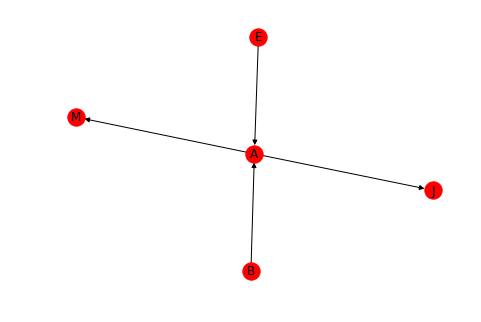

In [57]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline

N = ["B", "A", "M", "J", "E"]
E = [("B", "A"), ("E", "A"), ("A", "M"), ("A", "J")]

G = nx.DiGraph()
G.add_nodes_from(N)
G.add_edges_from(E)
nx.draw(G, with_labels=True)
plt.show()

In [60]:
# Probabilities computed from observed data.
# We know how often burglaries and earthquakes have happened, and that the alarm went off
# every time either a burglary or an earthquake happened, and finally, that Mary or John
# called when the alarm went off. All the occurances of events mentioned are recorded, and
# were used to compute their probabilities.
P = {
    "B": {
        "+b": 0.001,
        "-b": 0.999,
    },
    "E": {
        "+e": 0.002,
        "-e": 0.998,
    },
    "J|A": {
        ("+a", "+j"): 0.9,
        ("+a", "-j"): 0.1,
        ("-a", "+j"): 0.05,
        ("-a", "-j"): 0.95,
    },
    "M|A": {
        ("+a", "+m"): 0.7,
        ("+a", "-m"): 0.3,
        ("-a", "+m"): 0.01,
        ("-a", "-m"): 0.99,
    },
    "A|B,E": {
        ("+b", "+e", "+a"): 0.95,
        ("+b", "+e", "-a"): 0.05,
        ("+b", "-e", "+a"): 0.94,
        ("+b", "-e", "-a"): 0.06,
        ("-b", "+e", "+a"): 0.29,
        ("-b", "+e", "-a"): 0.71,
        ("-b", "-e", "+a"): 0.001,
        ("-b", "-e", "-a"): 0.999,
    }
}

# These tables can be used to compute previously unobserved probabilities.
# For example, P(+b, -e, +a, -j, +m) = 
p = P["B"]["+b"] * P["E"]["-e"] * P["A|B,E"][("+b", "-e", "+a")] * P["J|A"][("+a", "-j")] * P["M|A"][("+a", "+m")]
print("P(+b, -e, +a, -j, +m) =", p)

P(+b, -e, +a, -j, +m) = 6.56684e-05
